In [1]:
from helpers import *
import pickle
from itertools import product
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

(2, 250000)
(2, 250000)
(2, 250000)
(2, 250000)
(2, 250000)


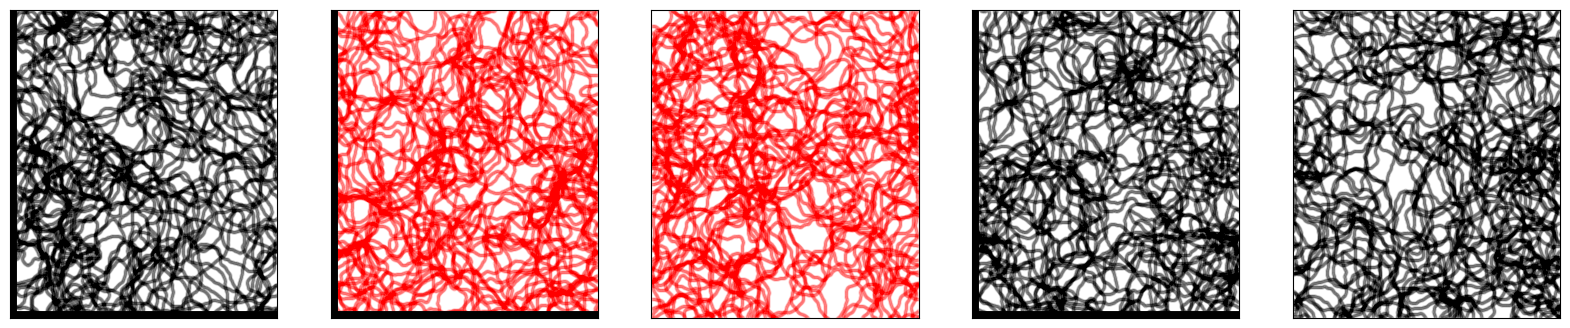

In [2]:

def plot_2d_run(t_run, x_run, out = '', ax=None, color='black', novel=False):

    #TODO: This will go into helpers.py
    sc = ax.scatter(x_run[0,:], x_run[1,:], s=5, alpha=0.01, color=color)  # Use 'viridis' or another colormap
    print(x_run.shape)
    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_xlim(0, 50)  
    ax.set_ylim(0, 50)

    patch_corner = (0, 0) if not novel else (50, 50)

    # Add box walls
    rect = patches.Rectangle(
        patch_corner,                    # Lower left corner
        100, 100,                  # Width and height
        linewidth=10,
        edgecolor='black',
        facecolor='none'
        )
    ax.add_patch(rect)


fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharex=True, dpi=100)

for i, (trial, params) in enumerate(ENVIRONMENTS_RUNS.items()):
    color = 'black' if params['top_down'] else 'red'
    with open(f'simulations/data/2d_test/run_{trial}.pkl', 'rb') as f:
        t_run, x_run = pickle.load(f)

    plot_2d_run(t_run, x_run, trial, axs[i], color=color, novel=params['new_env'])

F1
F2
N1
F3
N2


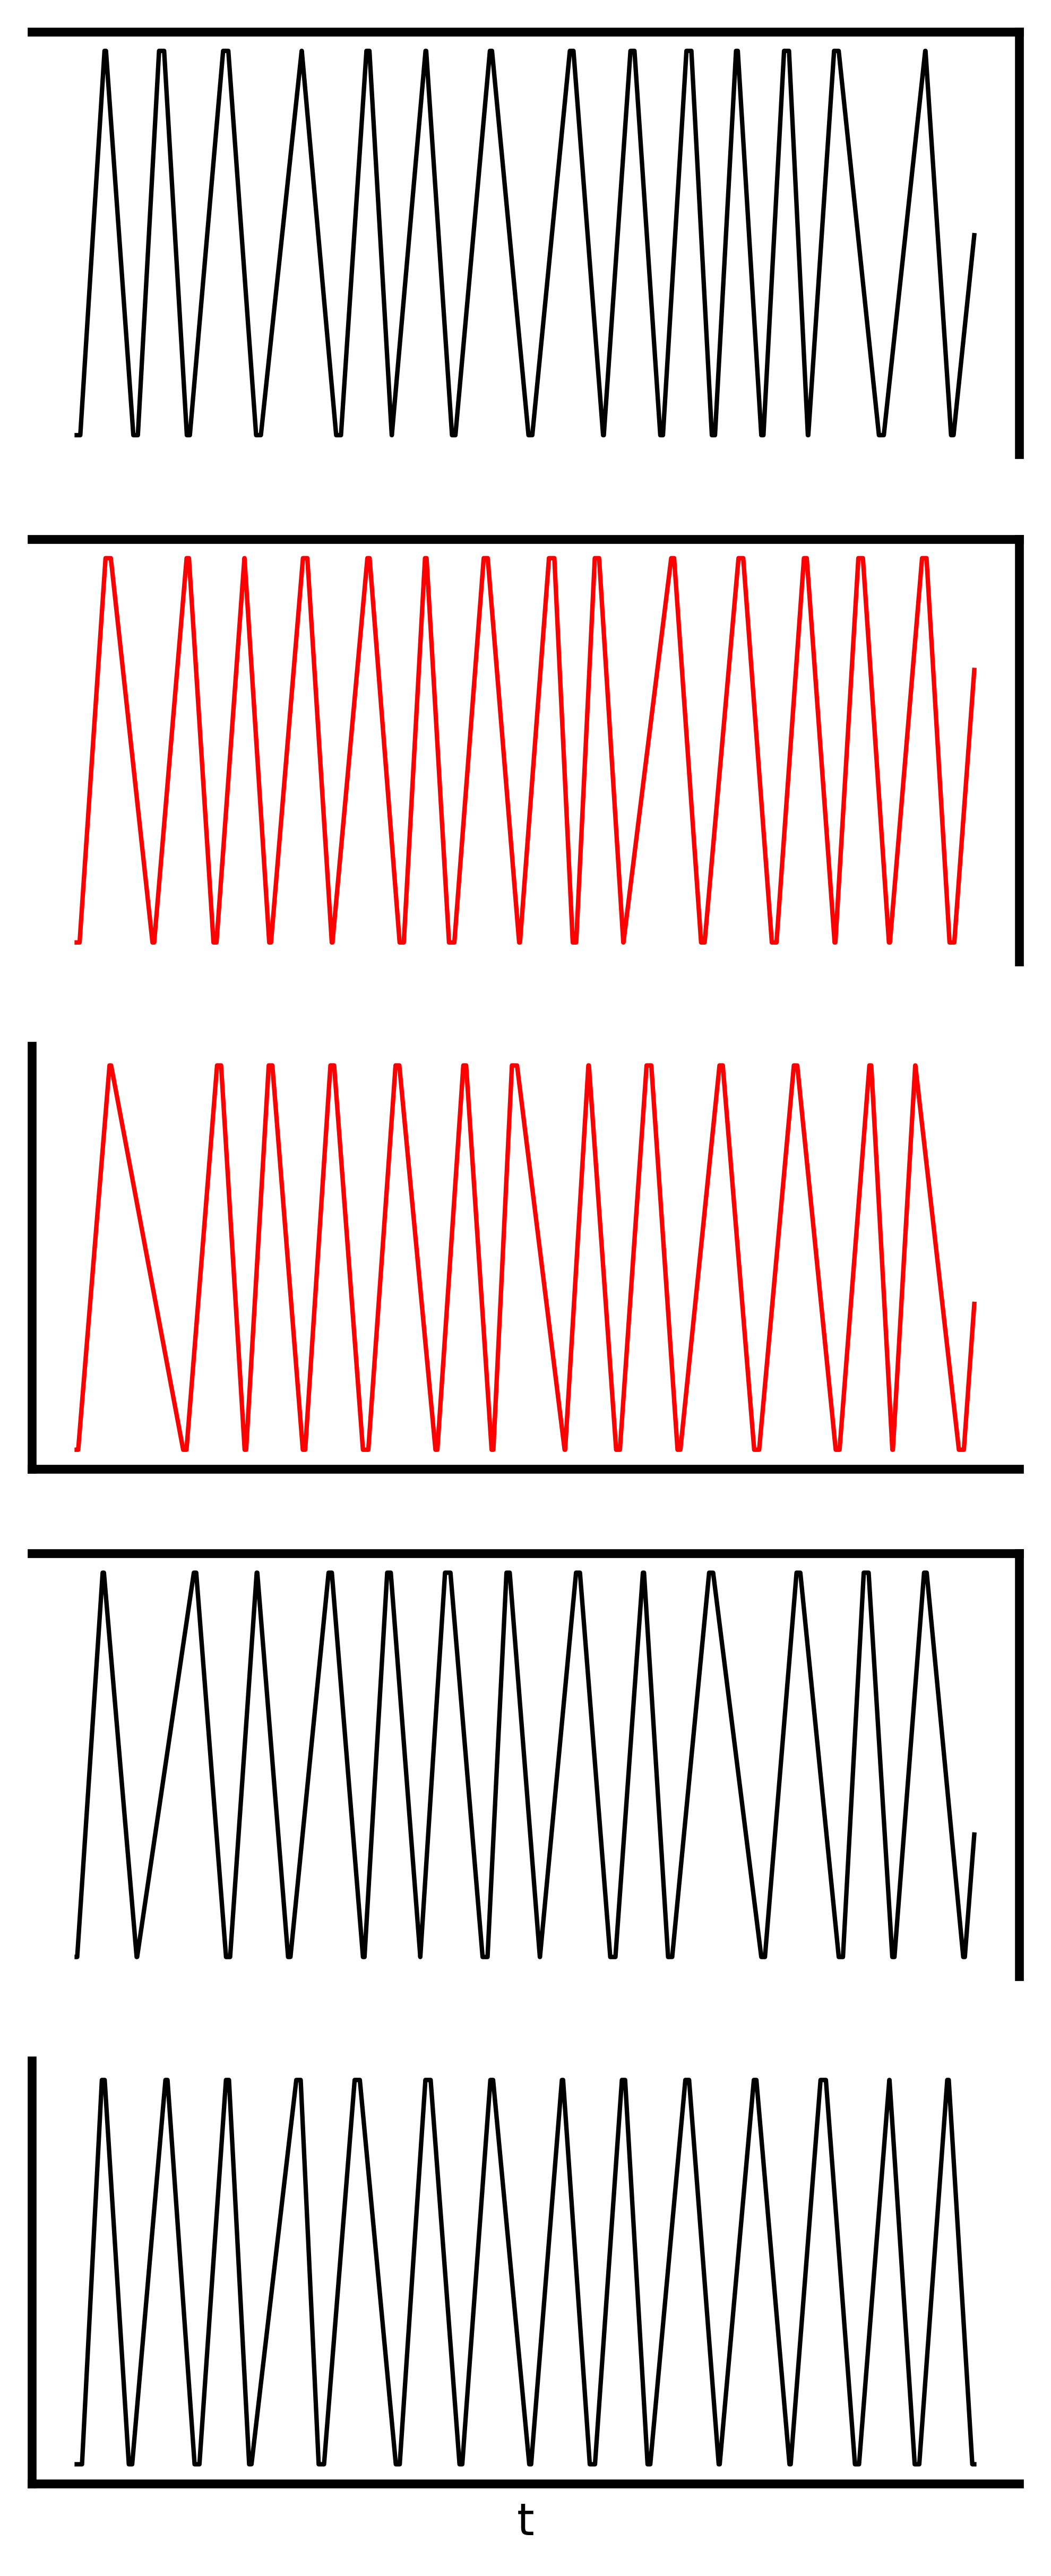

In [3]:


def plot_run(t, x, ax=None, color='black', novel=False, trial=''):
    # TODO: This will go into helpers.py
    

    # extent = [t.min(), t.max(), 0, activity.shape[0],]   

    ax.plot(t, x, color=color, linewidth=1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel(trial, fontsize=18)

    patch_corner = (0, 0) if not novel else (50, 50)

    # Thicker left and bottom spines
    if novel:
        ax.spines['left'].set_linewidth(2)
        ax.spines['bottom'].set_linewidth(2)
        ax.spines['top'].set_linewidth(0)
        ax.spines['right'].set_linewidth(0)

    else:
        # Thinner top and right spines
        ax.spines['top'].set_linewidth(2)
        ax.spines['right'].set_linewidth(2)
        ax.spines['left'].set_linewidth(0)
        ax.spines['bottom'].set_linewidth(0)



fig, axs = plt.subplots(5, 1, figsize=(4, 10), sharex=True, dpi=600)
axs[-1].set_xlabel("t")

for i, (trial, params) in enumerate(ENVIRONMENTS_RUNS.items()):
    color = 'black' if params['top_down'] else 'red'
    print(trial)
    with open(f'simulations/data/1d_2envs_test/x_run_{trial}.pkl', 'rb') as f: # TODO: Maybe change path here
        t_run, x_run = pickle.load(f)

    plot_run(t_run, x_run, axs[i], color=color, novel=params['new_env'])

plt.show()
plt.close()


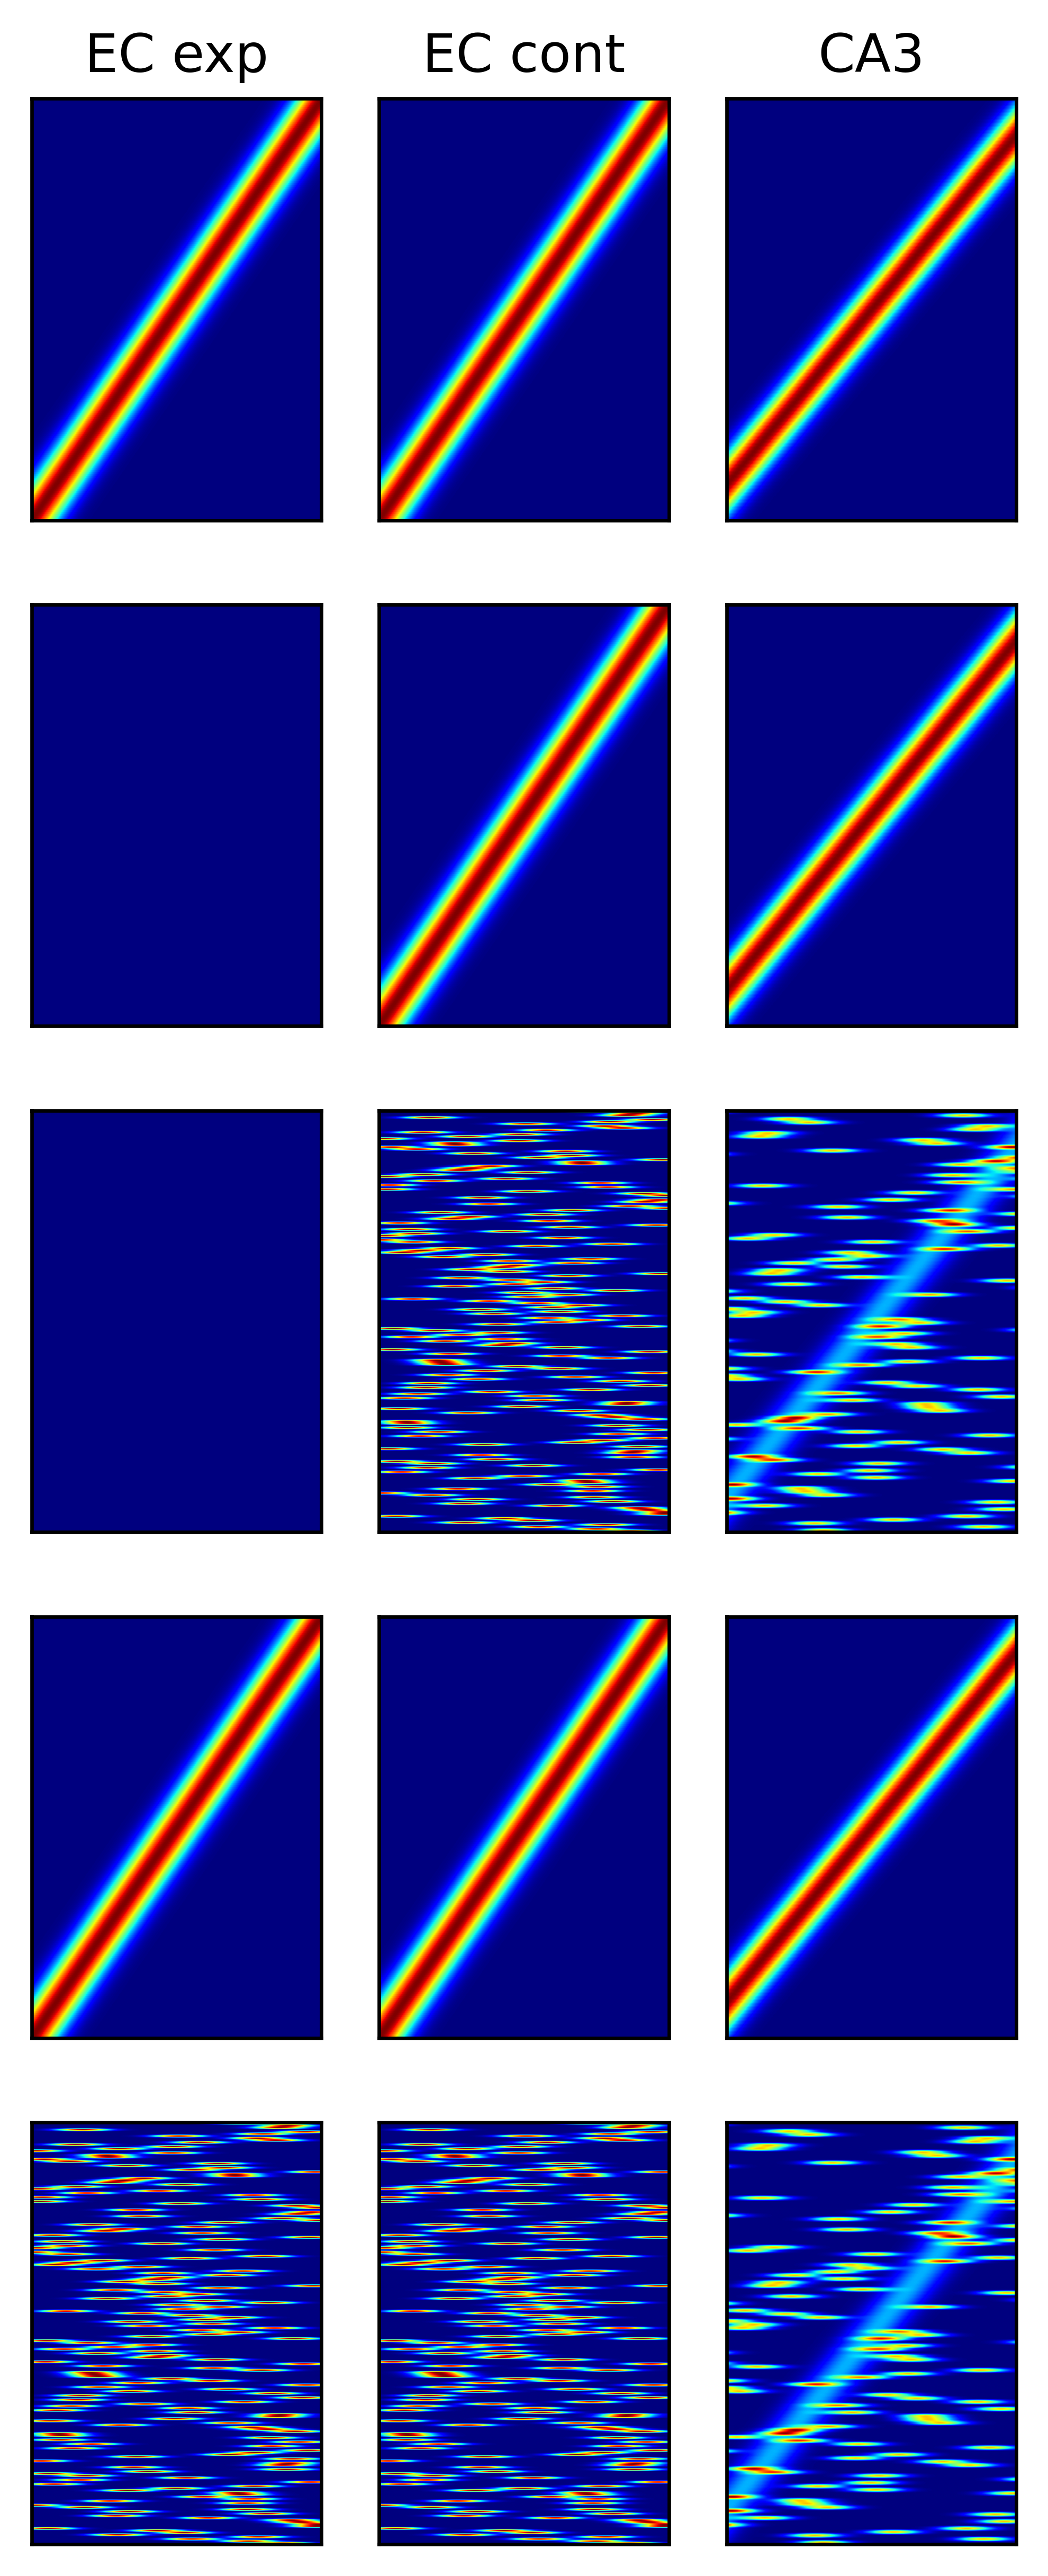

In [4]:
ca1 = PyramidalCells(
    N_CELLS['1D'],
    len_edge=LEN_TRACK_1D,
    n_dim = 1,
    seed=101
)


fig, axs = plt.subplots(5, 3, figsize=(4, 10), sharex=True, dpi=600)
axs[0, 0].set_title("EC experimental")
axs[0, 1].set_title("EC control")
axs[0, 2].set_title("CA3")

titles = ['EC exp', 'EC cont', 'CA3']

for i, condition in enumerate(['exp', 'control', 'CA3']):
    area = 'CA3' if condition == 'CA3' else 'EC'
    for j, (trial, params) in enumerate(ENVIRONMENTS_RUNS.items()):
        act = ca1.get_input_map(area=area, env=params['new_env'], a=A if condition == 'CA3' else 0)
        act = np.zeros_like(act) if (not params['top_down'] and condition == 'exp') else act
        sort_TD = np.argsort(ca1.m_CA3) if condition == 'CA3' else np.argsort(ca1.m_EC)
        sorted_fr = act[np.ix_(sort_TD, np.arange(act.shape[1]))]
        
        out = titles[i] if j == 0 else ""
        plot_firing_rates(axs[j, i], sorted_fr, out, vmin=None, vmax=None, fontsize=12, con='')



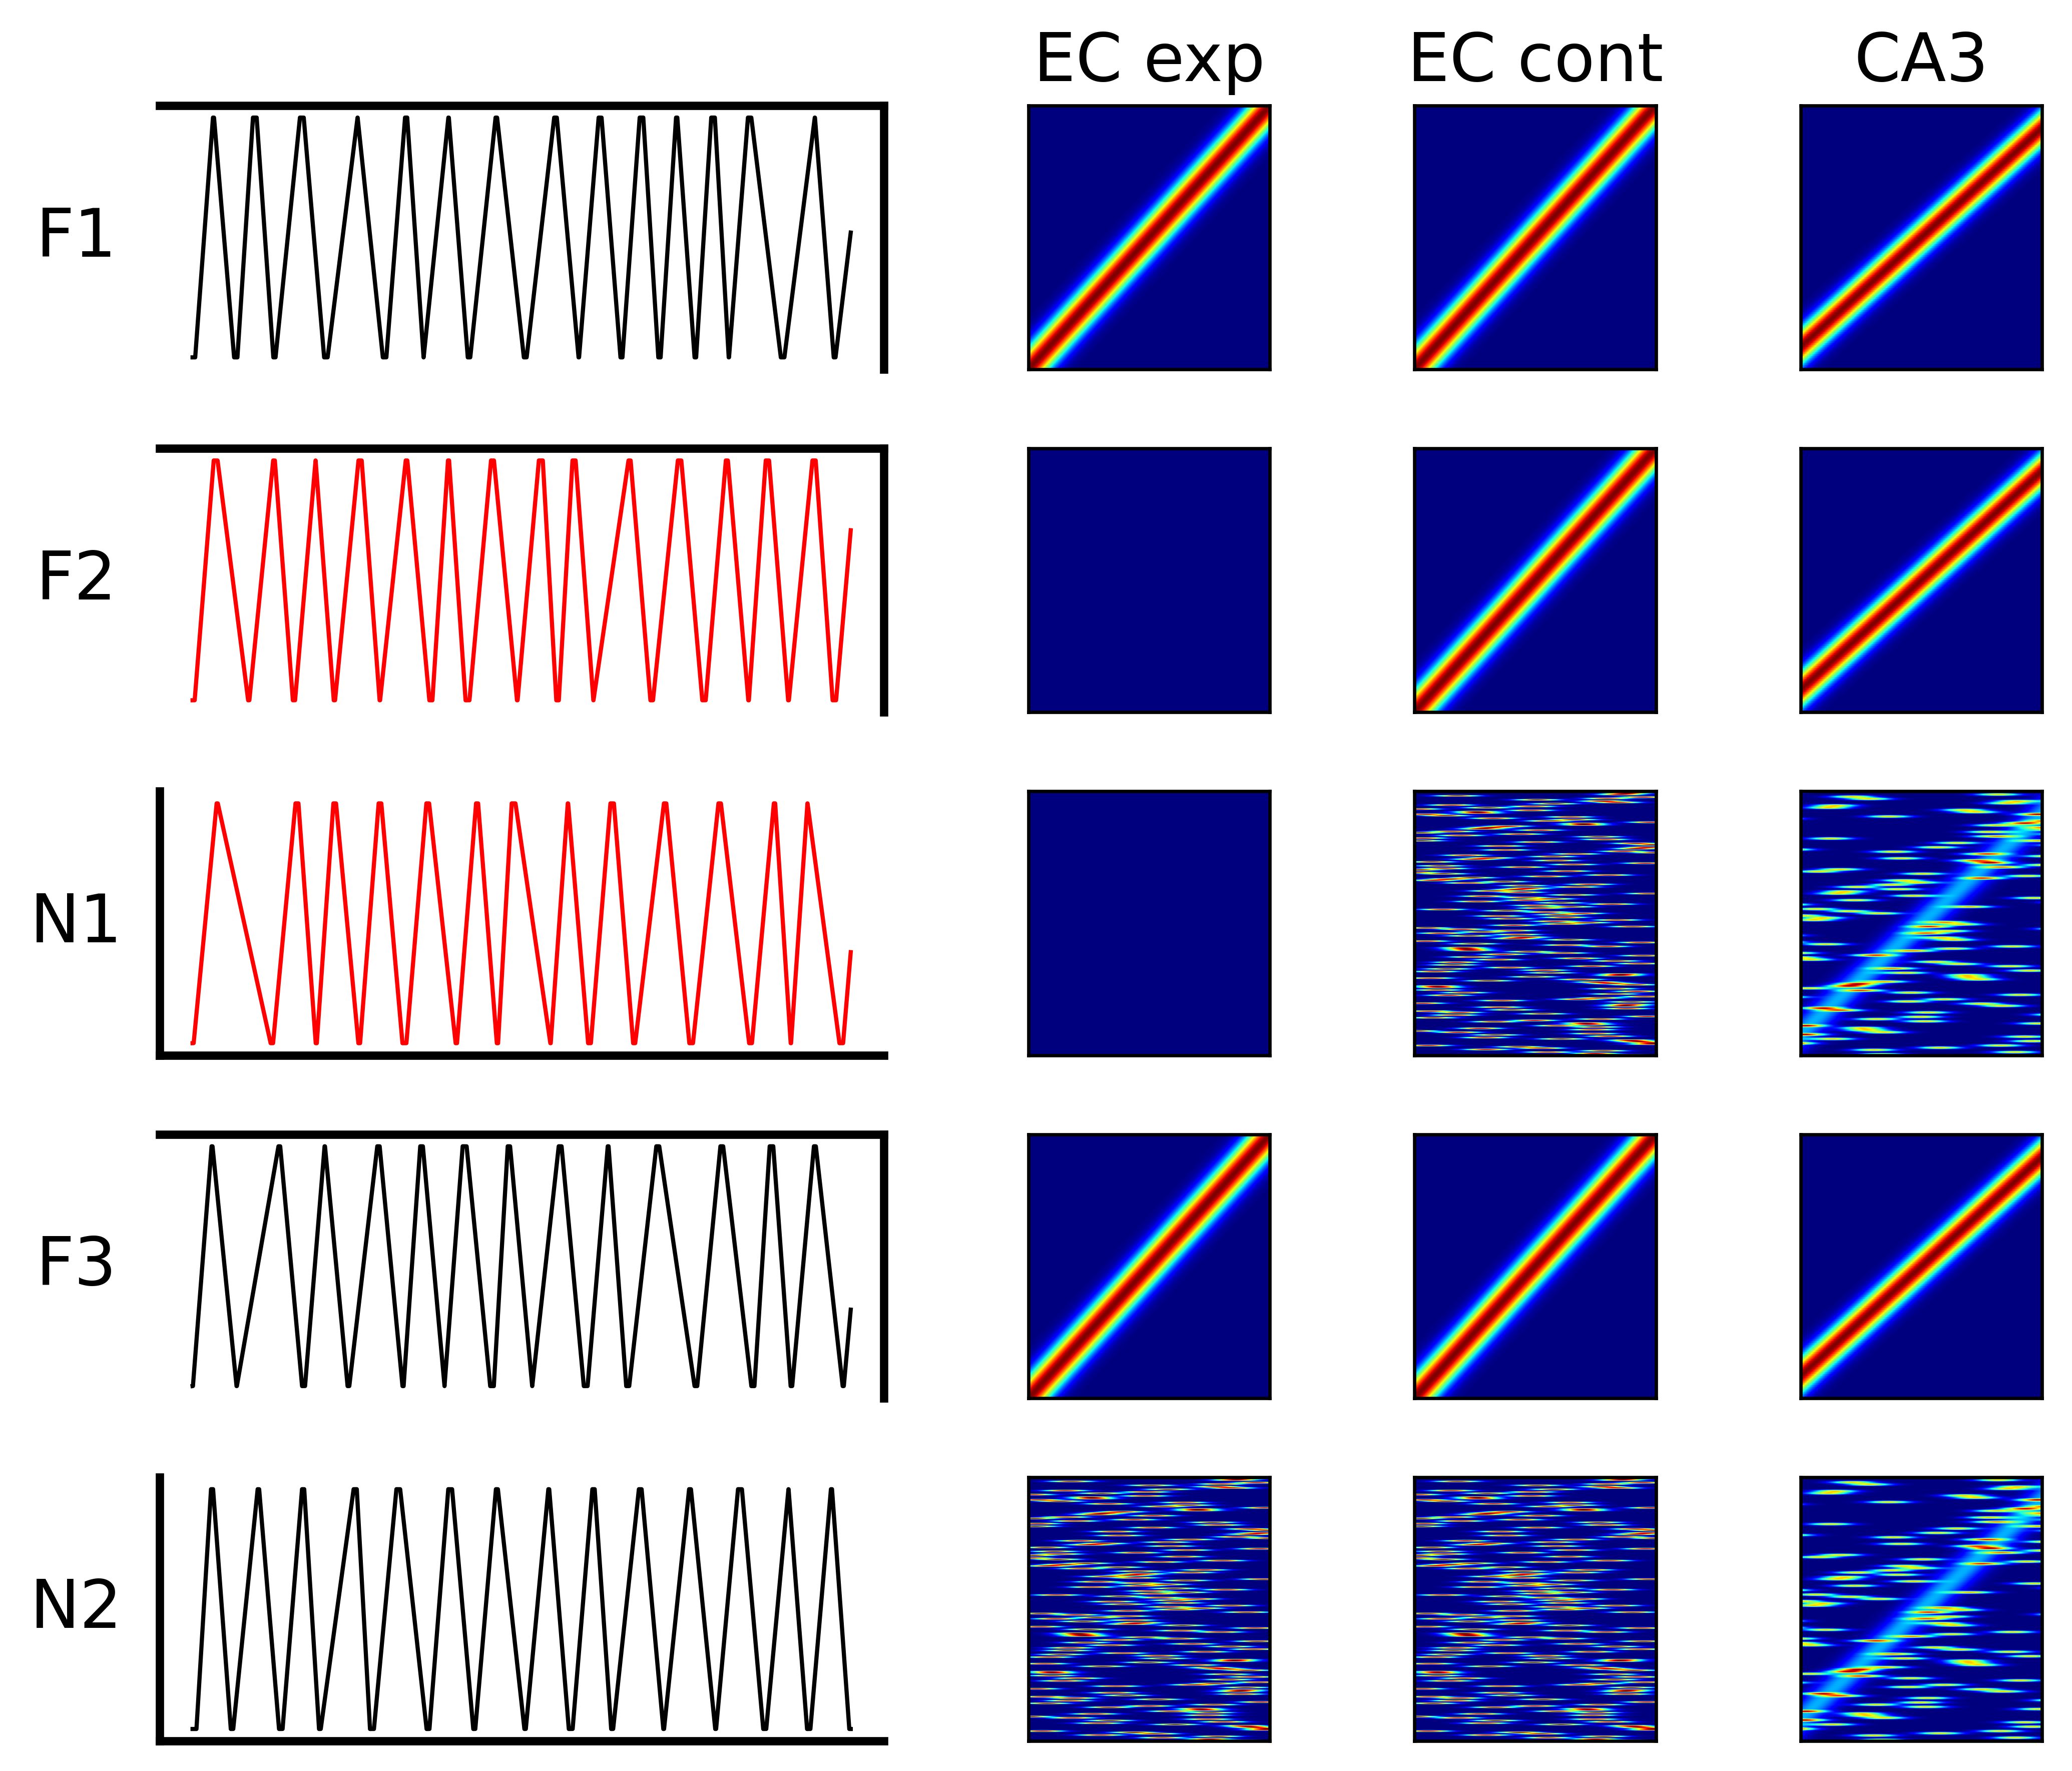

In [5]:


def plot_run(t, x, ax=None, color='black', novel=False, trial=''):
    # TODO: This will go into helpers.py
    

    # extent = [t.min(), t.max(), 0, activity.shape[0],]   

    ax.plot(t, x, color=color, linewidth=1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel(trial, fontsize=16, rotation=0, labelpad=20, verticalalignment='center')

    patch_corner = (0, 0) if not novel else (50, 50)

    # Thicker left and bottom spines
    if novel:
        ax.spines['left'].set_linewidth(2)
        ax.spines['bottom'].set_linewidth(2)
        ax.spines['top'].set_linewidth(0)
        ax.spines['right'].set_linewidth(0)

    else:
        # Thinner top and right spines
        ax.spines['top'].set_linewidth(2)
        ax.spines['right'].set_linewidth(2)
        ax.spines['left'].set_linewidth(0)
        ax.spines['bottom'].set_linewidth(0)


fig, axs = plt.subplots(
    5, 4,
    figsize=(7, 6),
    sharex='col',
    dpi=600,
    gridspec_kw={'width_ratios': [3, 1, 1, 1]}  # leftmost col twice as wide
)

# Titles for columns 1–3 (heatmaps)
axs[0, 1].set_title("EC experimental")
axs[0, 2].set_title("EC control")
axs[0, 3].set_title("CA3")

# Plot runs in first column
for j, (trial, params) in enumerate(ENVIRONMENTS_RUNS.items()):
    color = 'black' if params['top_down'] else 'red'
    with open(f'simulations/data/1d_2envs_test/x_run_{trial}.pkl', 'rb') as f:
        t_run, x_run = pickle.load(f)
    plot_run(t_run, x_run, axs[j, 0], color=color, novel=params['new_env'], trial=trial)

# Plot heatmaps in columns 1–3
titles = ['EC exp', 'EC cont', 'CA3']
for i, condition in enumerate(['exp', 'control', 'CA3']):
    area = 'CA3' if condition == 'CA3' else 'EC'
    for j, (trial, params) in enumerate(ENVIRONMENTS_RUNS.items()):
        act = ca1.get_input_map(area=area, env=params['new_env'], a=A if condition == 'CA3' else 0)
        act = np.zeros_like(act) if (not params['top_down'] and condition == 'exp') else act
        sort_TD = np.argsort(ca1.m_CA3) if condition == 'CA3' else np.argsort(ca1.m_EC)
        sorted_fr = act[np.ix_(sort_TD, np.arange(act.shape[1]))]
        out = titles[i] if j == 0 else ""
        plot_firing_rates(axs[j, i+1], sorted_fr, out, vmin=None, vmax=None, fontsize=16, con='')

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.3) 
plt.show()

In [6]:
alphas = [0.001] 
aas = [0.4]
lrs = [10]   
ma_pcs = [10000] 
mb_pcs = [1000]
W_ip_a = [0]
W_pi_a = [0] 
W_ip_b = [10000]
W_pi_b = [0] 
tau_a = [1.0]
inh_lrs = [0.0001] ## TODO: MAybe even less?! probably need to tune again, last time i was running with weird normalization
betas = [0.1] ## TODO: This one could still be tuned.  probably need to tune again, last time i was running with weird normalization

param_combinations = list(product(alphas, aas, lrs, ma_pcs, mb_pcs, W_pi_a, W_ip_a, W_pi_b, W_ip_b, tau_a, inh_lrs, betas))



Wpib:  0 Wipb:  10000
M_EC:  [24.48979592  7.14285714]


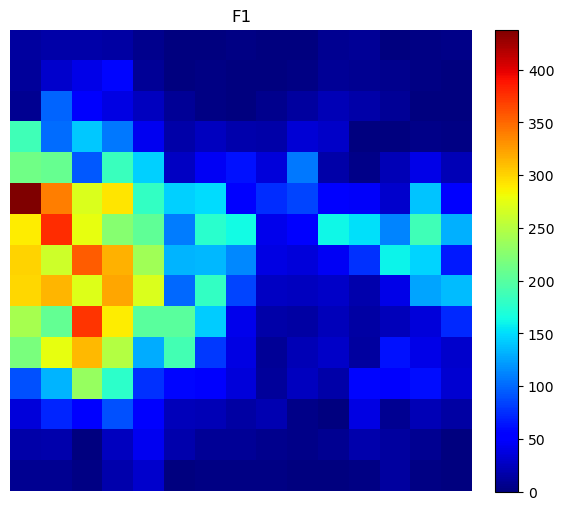

M_EC:  [ 2.04081633 36.73469388]


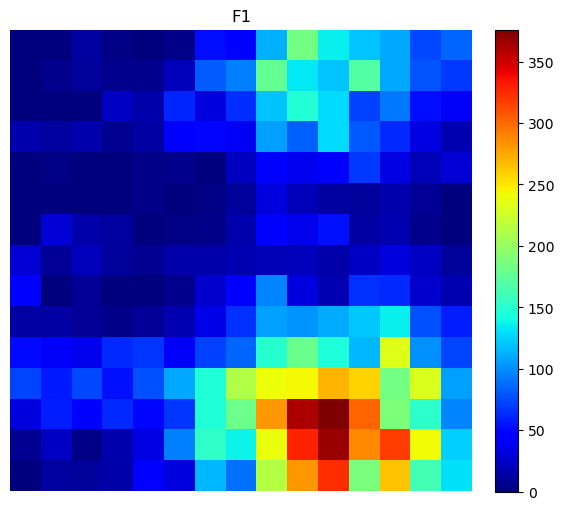

M_EC:  [47.95918367 42.85714286]


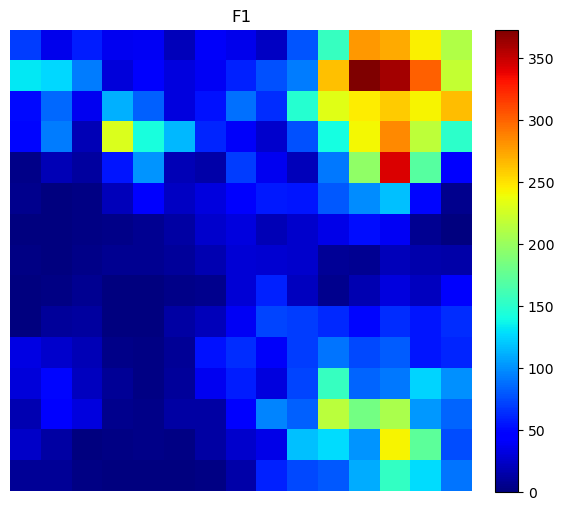

M_EC:  [31.63265306 32.65306122]


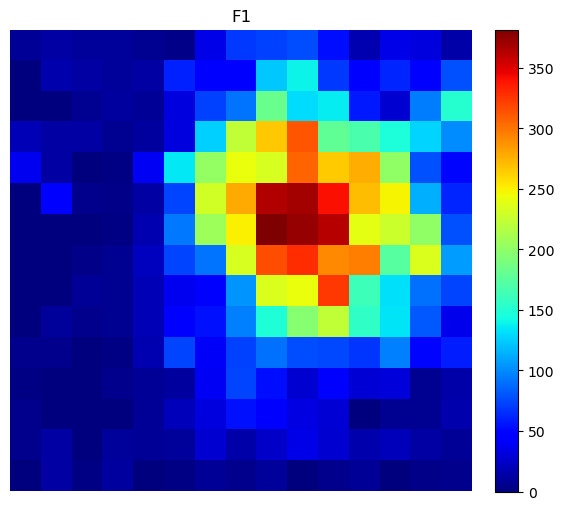

M_EC:  [23.46938776 35.71428571]


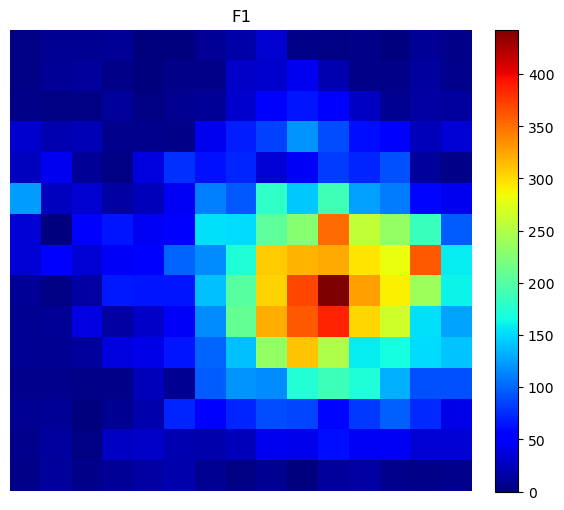

M_EC:  [33.67346939 10.20408163]


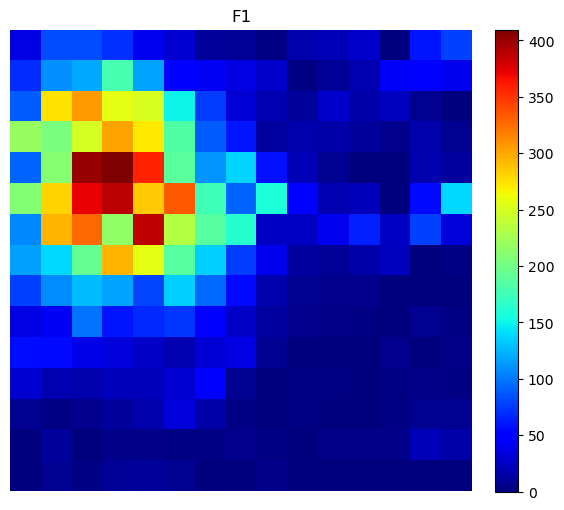

M_EC:  [45.91836735 42.85714286]


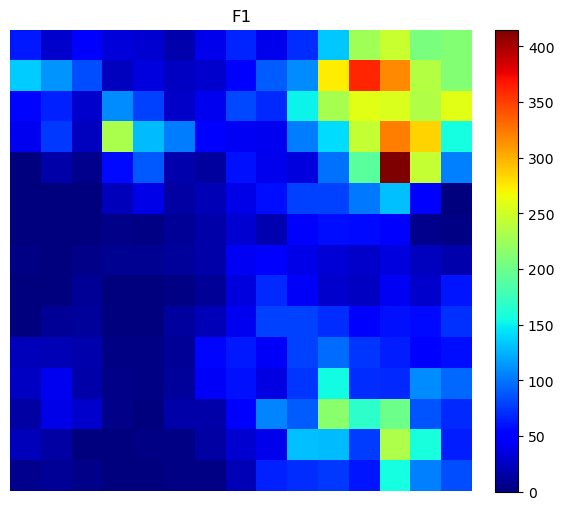

M_EC:  [34.69387755 50.        ]


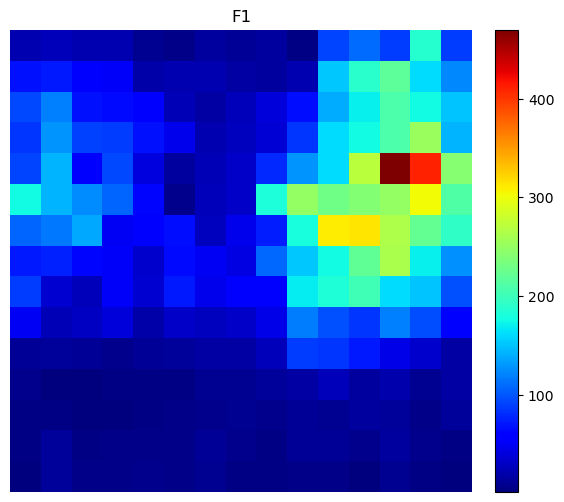

M_EC:  [26.53061224 29.59183673]


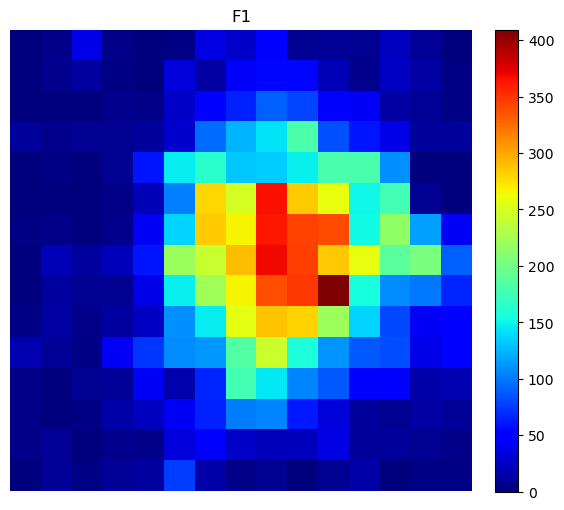

M_EC:  [37.75510204 34.69387755]


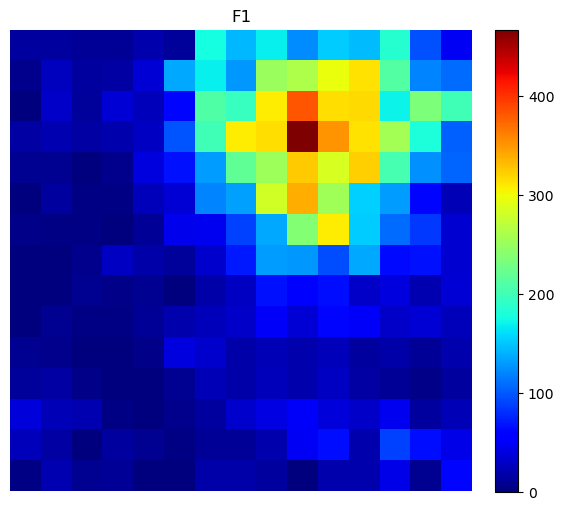

In [7]:
out = 'F1' #for now
condition = 'exp' #for now


for param_combination in param_combinations:
    alpha, a, lr, ma_pc, mb_pc, W_pi_a, W_ip_a, W_pi_b, W_ip_b, tau_a, inh_lr, beta = param_combination
        # Load the data

    path = f'simulations/data/2d/F1/alpha_{alpha}_a_{a}_lr_{lr}_ma_{ma_pc}_mb_{mb_pc}_W_pi_a_{W_pi_a}_W_ip_a_{W_ip_a}_W_pi_b_{W_pi_b}_W_ip_b_{W_ip_b}_tau_a_{tau_a}_beta_{beta}_inhlr_{inh_lr}_inh_False/{condition}_{out}.pkl'
    if not os.path.exists(path):
        print(f"File {path} does not exist. Skipping...")
        continue

    with open(path, 'rb') as f:
        act_maps, m_EC = pickle.load(f)

    print('Wpib: ', W_pi_b, 'Wipb: ', W_ip_b)
        
    for i in range(10):
        print('M_EC: ', m_EC[:, i])
        fig, ax = plt.subplots(1, 1, figsize=(6, 6))

        act_map = act_maps[i, :].reshape(int(np.sqrt(act_maps.shape[1])), 
                                                    int(np.sqrt(act_maps.shape[1])))
                        
        im = ax.imshow(act_map, cmap='jet', origin='lower')

        # Add colorbar (with adjusted padding)
        cbar_ax = ax.inset_axes([1.05, 0, 0.05, 1])
        fig.colorbar(im, cax=cbar_ax)
        ax.set_title(out, fontsize=12)
        ax.axis('off')
        plt.show()
        plt.close()

